In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import cv2
##Para conectar con el drive
from skimage import io,filters

In [8]:
PATH= '../Base de datos/BD 810/'

In [9]:
##SANA
image1 = cv2.imread(PATH + "1" + ".jpg", cv2.IMREAD_COLOR)

image4 = cv2.imread(PATH + "100" + ".jpg", cv2.IMREAD_COLOR)
image7 = cv2.imread(PATH + "260" + ".jpg", cv2.IMREAD_COLOR)

##RUST (Roya)
image2 = cv2.imread(PATH + "342" + ".jpg", cv2.IMREAD_COLOR)
image5 = cv2.imread(PATH + "275" + ".jpg", cv2.IMREAD_COLOR)
image8 = cv2.imread(PATH + "500" + ".jpg", cv2.IMREAD_COLOR)

##SCAB (Sarna)
image3 = cv2.imread(PATH + "588" + ".jpg", cv2.IMREAD_COLOR)
image6 = cv2.imread(PATH + "600" + ".jpg", cv2.IMREAD_COLOR)
image9 = cv2.imread(PATH + "700" + ".jpg", cv2.IMREAD_COLOR)

# MÉTODOS DE COLORES

In [10]:
def retinex_correction(image, sigma=50):
    # Aplicar la corrección de brillo
    #imagen_ajustada = correccion_brillo_adaptativo(image)
    # Convertir la imagen al espacio de color logarítmico
    log_image = np.log1p(image.astype(np.float32))

    # Calcular el tamaño del kernel para el filtro Gaussiano
    ksize = (sigma * 6 + 1, sigma * 6 + 1)
    ksize = (ksize[0] // 2 * 2 + 1, ksize[1] // 2 * 2 + 1)  # Asegurar un tamaño impar

    # Aplicar el filtro Gaussiano en la imagen logarítmica
    blur_image = cv2.GaussianBlur(log_image, ksize, 0)

    # Calcular la diferencia entre la imagen logarítmica original y la filtrada
    diff_image = log_image - blur_image

    # Obtener la imagen corregida sumando la diferencia a la imagen original
    corrected_image = np.clip(image + diff_image, 0, 255).astype(np.uint8)

    return corrected_image

def preprocess_image(image):
    # Aplicar la corrección de iluminación Retinex
    corrected_image = retinex_correction(image)

    # Convertir la imagen corregida al espacio de color HSV
    hsv = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2HSV)

    # Definir el rango de color de la hoja en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([100, 255, 255])  # Ajustar los valores para incluir más tonos de verde
    # Definir el rango de color adicional en HSV para detectar el tono de verde específico
    #lower_green_additional = np.array([99, 0, 63])
    #upper_green_additional = np.array([119, 19, 73])
    lower_green_additional = np.array([25, 0, 0])
    upper_green_additional = np.array([40, 255, 255])
    # Definir el rango de color adicional en HSV para detectar el tono de verde específico
    lower_green_additional_2 = np.array([50, 0, 0])
    upper_green_additional_2 = np.array([70, 255, 255])

    # Crear una máscara para la zona verde
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Aplicar la máscara adicional de zona verde más birllante
    mask_additional = cv2.inRange(hsv, lower_green_additional, upper_green_additional)

    # Aplicar la máscara adicional 2 al espacio de color HSV
    mask_additional_2 = cv2.inRange(hsv, lower_green_additional_2, upper_green_additional_2)

      # Combinar las máscaras actual y adicional
    mask_combined = cv2.bitwise_or(green_mask, mask_additional)

    # Combinar las máscaras actual, adicional y adicional 2
    mask_combined = cv2.bitwise_or(mask_combined, mask_additional_2)

    # Aplicar operaciones morfológicas para eliminar el ruido y mejorar los bordes
    kernel = np.ones((5, 5), np.uint8)
    green_mask = cv2.morphologyEx(mask_combined, cv2.MORPH_OPEN, kernel, iterations=2)
    green_mask = cv2.morphologyEx(mask_combined, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Aplicar detección de contornos y eliminar los contornos pequeños
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_contour_area = 1000  # Área mínima del contorno para considerar como zona verde
    for contour in contours:
        if cv2.contourArea(contour) < min_contour_area:
            cv2.drawContours(green_mask, [contour], -1, 0, thickness=cv2.FILLED)

    # Aplicar las máscaras a la imagen original
    green_segmented = cv2.bitwise_and(image, image, mask=green_mask)

    # Retornar la imagen segmentada de la zona verde
    return green_segmented

Text(0.5, 1.0, 'Scab')

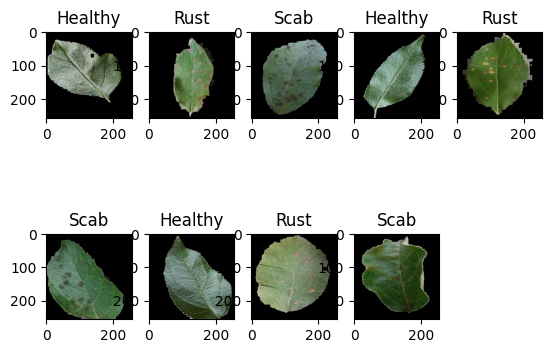

In [11]:
# Preprocesar la imagen
green_segmented1 = preprocess_image(image1)
green_segmented2 = preprocess_image(image2)
green_segmented3 = preprocess_image(image3)
green_segmented4 = preprocess_image(image4)
green_segmented5 = preprocess_image(image5)
green_segmented6 = preprocess_image(image6)
green_segmented7 = preprocess_image(image7)
green_segmented8 = preprocess_image(image8)
green_segmented9 = preprocess_image(image9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(green_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(green_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(green_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(green_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(green_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(green_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(green_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(green_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(green_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

## Eliminando zonas verdes

In [12]:
def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a HSV
    hsv_green = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2HSV)

    # Definir el rango de colores verde en HSV
    lower_green = np.array([30, 30, 30])
    upper_green = np.array([100, 255, 255])

    # Crear una máscara para eliminar las partes verdes de la hoja
    green_mask = cv2.inRange(hsv_green, lower_green, upper_green)

    # Aplicar la máscara para eliminar las partes verdes de la imagen segmentada
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=cv2.bitwise_not(green_mask))

    return disease_segmented

Text(0.5, 1.0, 'Scab')

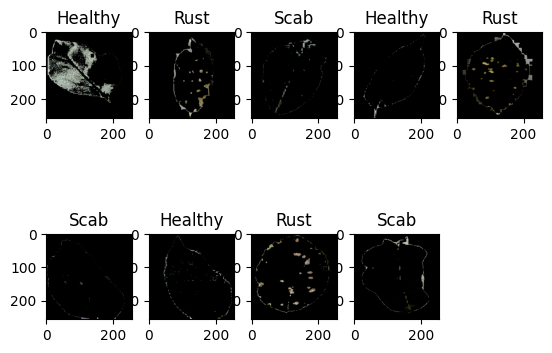

In [13]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

## Resaltando zonas cafes, amarillas, negras

In [14]:
import cv2
import numpy as np

def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a HSV
    hsv_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2HSV)

    # Definir los rangos de colores para la segmentación
    yellow_range = [(24, 50, 50), (34, 255, 255)]
    orange_range = [(18, 50, 50), (28, 255, 255)]
    dark_brown_range = [(10, 30, 20), (20, 255, 90)]
    light_brown_range = [(20, 20, 50), (50, 120, 180)]
    black_range = [(0, 0, 0), (180, 255, 50)]
    #dark_green_range = [(40, 50, 30), (60, 255, 100)]
    #light_green_range = [(65, 20, 50), (85, 120, 180)]

    # Aplicar las máscaras de segmentación a la imagen en HSV
    yellow_mask = cv2.inRange(hsv_image, np.array(yellow_range[0]), np.array(yellow_range[1]))
    orange_mask = cv2.inRange(hsv_image, np.array(orange_range[0]), np.array(orange_range[1]))
    dark_brown_mask = cv2.inRange(hsv_image, np.array(dark_brown_range[0]), np.array(dark_brown_range[1]))
    light_brown_mask = cv2.inRange(hsv_image, np.array(light_brown_range[0]), np.array(light_brown_range[1]))
    black_mask = cv2.inRange(hsv_image, np.array(black_range[0]), np.array(black_range[1]))
    #dark_green_mask = cv2.inRange(hsv_image, np.array(dark_green_range[0]), np.array(dark_green_range[1]))
    #light_green_mask = cv2.inRange(hsv_image, np.array(light_green_range[0]), np.array(light_green_range[1]))

    # Combinar las máscaras
    combined_mask = yellow_mask + orange_mask + dark_brown_mask + light_brown_mask + black_mask

    # Aplicar la máscara combinada a la imagen segmentada de verde
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=combined_mask)

    return disease_segmented


Text(0.5, 1.0, 'Scab')

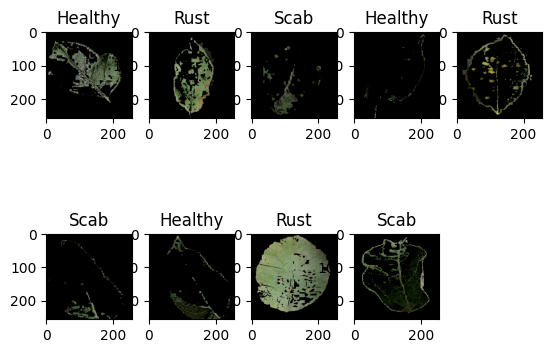

In [15]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

Con el intento 5 de la Segmentación>Uno>Final Segmentacion>Método 5

In [16]:
import cv2
import numpy as np

def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a HSV
    hsv_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2HSV)

    lower_range = np.array([0, 50, 50])
    upper_range = np.array([30, 255, 255])

    # Crear una máscara para los píxeles dentro del rango
    mask = cv2.inRange(hsv_image, lower_range, upper_range)

    # Aplicar la máscara combinada a la imagen segmentada de verde
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=mask)

    return disease_segmented


Text(0.5, 1.0, 'Scab')

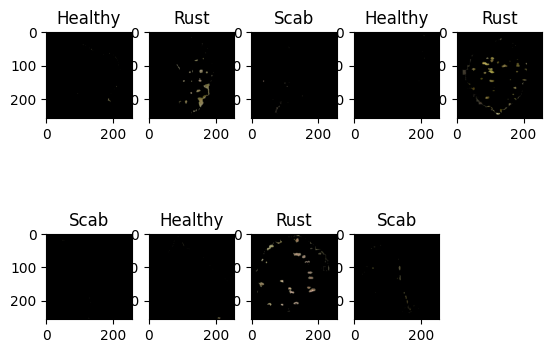

In [17]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

# METODOS DE REGIONES

## Usando el método MSER

In [18]:
def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a escala de grises
    gray_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2GRAY)

    # Inicializar el detector MSER
    mser = cv2.MSER_create()

    # Detectar las regiones extremas estables
    regions, _ = mser.detectRegions(gray_image)

    # Crear una máscara vacía del mismo tamaño que la imagen
    mask = np.zeros_like(gray_image)

    # Dibujar las regiones detectadas en la máscara
    for region in regions:
        x, y, w, h = cv2.boundingRect(region)
        cv2.rectangle(mask, (x, y), (x+w, y+h), (255, 255, 255), -1)

    # Aplicar la máscara a la imagen original
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=mask)

    return disease_segmented

Text(0.5, 1.0, 'Scab')

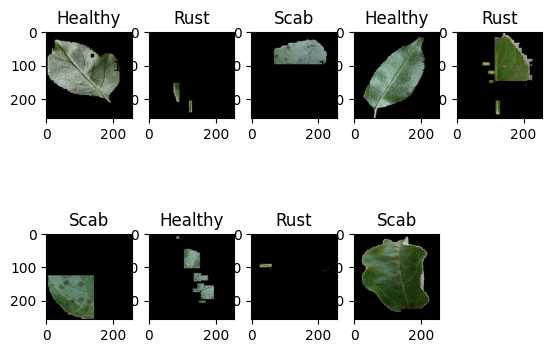

In [19]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

## Identificando regiones

Canny

In [20]:

def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a escala de grises
    gray_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2GRAY)

    # Aplicar el operador de Canny para detectar los bordes
    edges = cv2.Canny(gray_image, 30, 100)

    # Aplicar umbralización para obtener una máscara binaria
    _, threshold = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

    # Aplicar operaciones morfológicas para eliminar el ruido y mejorar los bordes
    kernel = np.ones((3, 3), np.uint8)
    threshold = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel, iterations=2)
    threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=2)

    # Aplicar la máscara a la imagen original
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=threshold)

    return disease_segmented

Text(0.5, 1.0, 'Scab')

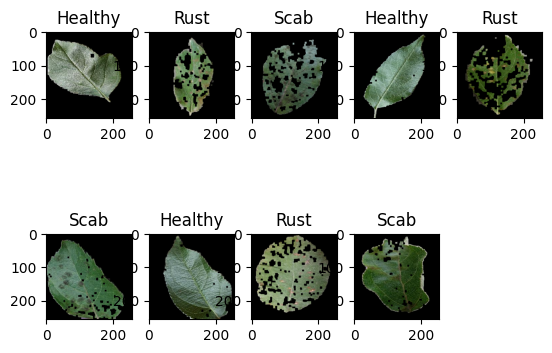

In [21]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

# MÉTODO DE COLOR 5 CON MEJORAMIENTO DE LA IMAGEN PARA RESALTAR MÁS ZONAS ENFERMAS FUNCIONA MUY BIEN EN RUST (ROYA)

Función para mejorar la imagen segmentada con color verde

In [35]:
def analisis_frecuencia(image):
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular la Transformada Rápida de Fourier (FFT)
    fft_imagen = np.fft.fftshift(np.fft.fft2(imagen_gris))

    # Calcular el espectro de frecuencia
    espectro_frecuencia = 20 * np.log(np.abs(fft_imagen))

    # Visualizar el espectro de frecuencia
    plt.imshow(espectro_frecuencia, cmap='gray')
    plt.colorbar()
    plt.title('Espectro de Frecuencia')
    plt.show()

def determinar_sigma(image):
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular la Transformada Rápida de Fourier (FFT)
    fft_imagen = np.fft.fftshift(np.fft.fft2(imagen_gris))

    # Calcular el espectro de frecuencia
    espectro_frecuencia = np.abs(fft_imagen)

    # Calcular el valor de umbral para distinguir el ruido de las frecuencias altas
    umbral = np.mean(espectro_frecuencia) * 0.1

    # Encontrar las coordenadas de las frecuencias altas
    frecuencias_altas = np.where(espectro_frecuencia > umbral)

    # Calcular las distancias de las frecuencias altas al centro del espectro
    distancias = np.sqrt((frecuencias_altas[0] - espectro_frecuencia.shape[0] // 2) ** 2 +
                         (frecuencias_altas[1] - espectro_frecuencia.shape[1] // 2) ** 2)

    # Obtener el valor máximo de distancia como el radio de las frecuencias altas
    radio = np.max(distancias)

    # Definir el valor de sigma en función del radio
    sigma = int(0.1 * radio)
    print(sigma)
    return sigma

def filtro_paso_alto_gaussiano(image, sigma):
    # Aplicar filtro Gaussiano a la imagen original
    #ksize = int(2 * round(2 * sigma) + 1)
    ksize = int(5)
    # Aplicar filtro Gaussiano a la imagen original
    imagen_suavizada = cv2.GaussianBlur(image, (ksize, ksize), sigma)

    # Calcular la diferencia entre la imagen original y la suavizada
    filtro_paso_alto = cv2.subtract(image, imagen_suavizada)
    return filtro_paso_alto

def resta_imagenes(imagen_original, imagen_suavizada):
    # Realizar la resta de imágenes
    diferencia = cv2.subtract(imagen_original, imagen_suavizada)
    plt.imshow(cv2.cvtColor(diferencia, cv2.COLOR_BGR2RGB))
    plt.show()
    return diferencia


In [39]:
def segment_disease(green_segmented):
    # Convertir la imagen segmentada de verde a HSV
    #sigma =  determinar_sigma(green_segmented)
    sigma = 20
    imagen_suavizada = filtro_paso_alto_gaussiano(green_segmented, sigma)
    green_segmented = resta_imagenes(green_segmented, imagen_suavizada)


    hsv_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2HSV)

    lower_range = np.array([0, 50, 50])
    upper_range = np.array([30, 255, 255])

    # Crear una máscara para los píxeles dentro del rango
    mask = cv2.inRange(hsv_image, lower_range, upper_range)

    # Aplicar la máscara combinada a la imagen segmentada de verde
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=mask)

    return disease_segmented


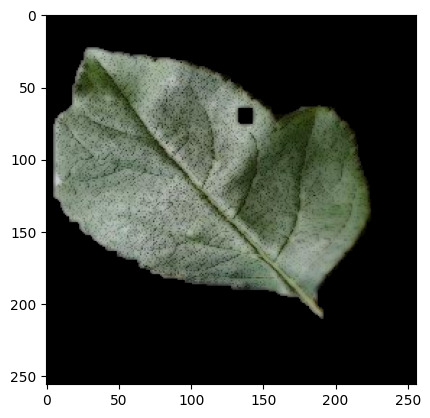

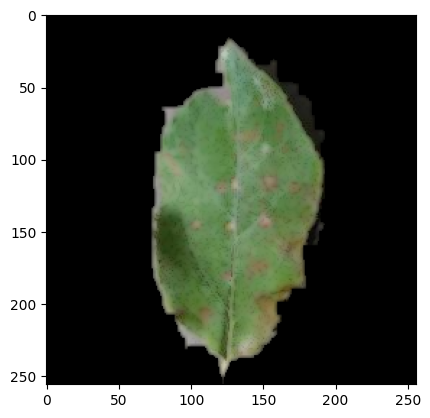

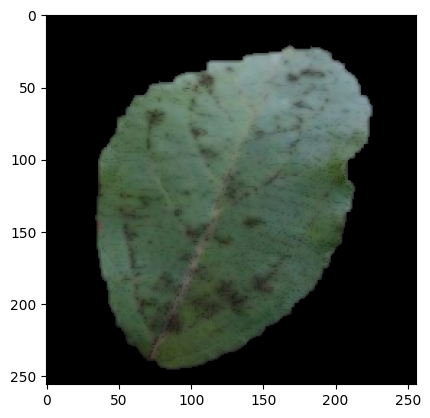

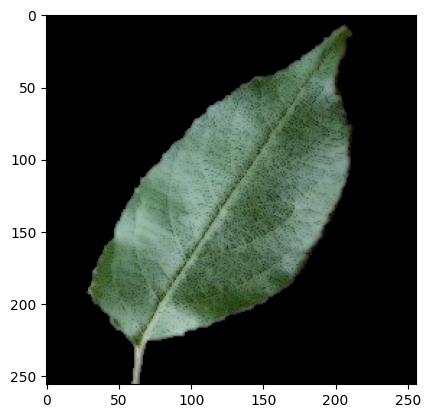

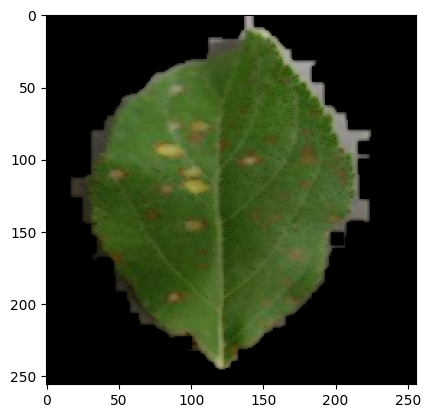

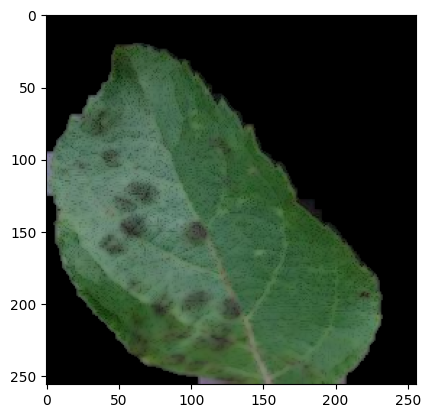

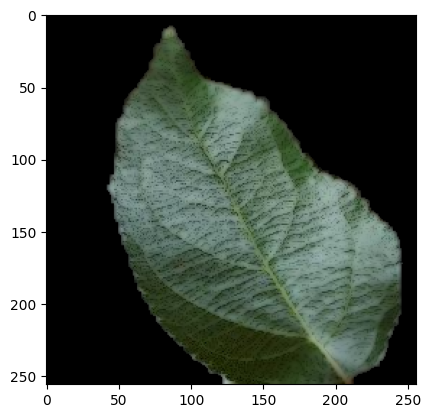

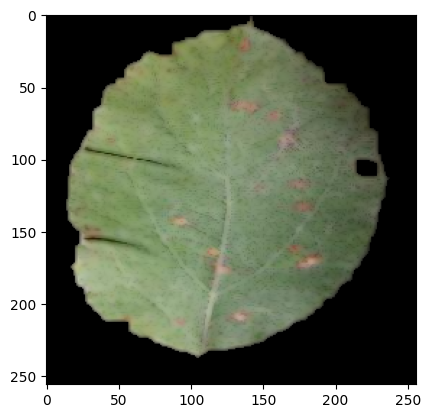

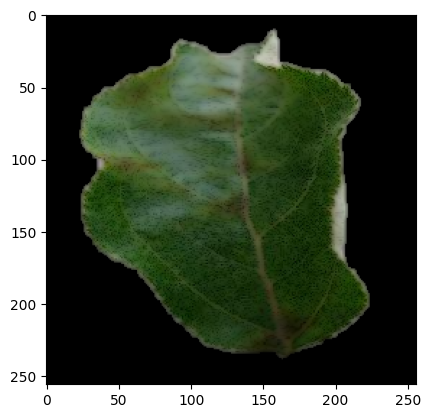

Text(0.5, 1.0, 'Scab')

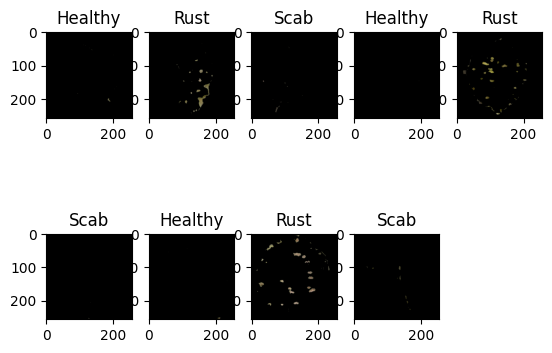

In [40]:
disease_segmented1= segment_disease(green_segmented1)
disease_segmented2= segment_disease(green_segmented2)
disease_segmented3= segment_disease(green_segmented3)
disease_segmented4= segment_disease(green_segmented4)
disease_segmented5= segment_disease(green_segmented5)
disease_segmented6= segment_disease(green_segmented6)
disease_segmented7= segment_disease(green_segmented7)
disease_segmented8= segment_disease(green_segmented8)
disease_segmented9= segment_disease(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(disease_segmented2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

In [61]:
def segment_disease_scab(green_segmented):
    hsv_image = cv2.cvtColor(green_segmented, cv2.COLOR_BGR2HSV)

    # Definir rangos de color para la detección de enfermedades

    lower_dark_brown = np.array([0, 0, 0])
    upper_dark_brown = np.array([20, 255, 75])

    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 30])

    lower_dark_green = np.array([70, 50, 50])
    upper_dark_green = np.array([90, 255, 255])

    # Crear máscaras para los colores especificados
    dark_brown_mask = cv2.inRange(hsv_image, lower_dark_brown, upper_dark_brown)
    black_mask = cv2.inRange(hsv_image, lower_black, upper_black)
    dark_green_mask = cv2.inRange(hsv_image, lower_dark_green, upper_dark_green)

    # Combinar todas las máscaras

    mask_combined = cv2.bitwise_or(black_mask, dark_brown_mask)
    mask_combined = cv2.bitwise_or(mask_combined, dark_green_mask)

    # Aplicar la máscara combinada a la imagen segmentada de verde
    disease_segmented = cv2.bitwise_and(green_segmented, green_segmented, mask=mask_combined)

    return disease_segmented

Text(0.5, 1.0, 'Scab')

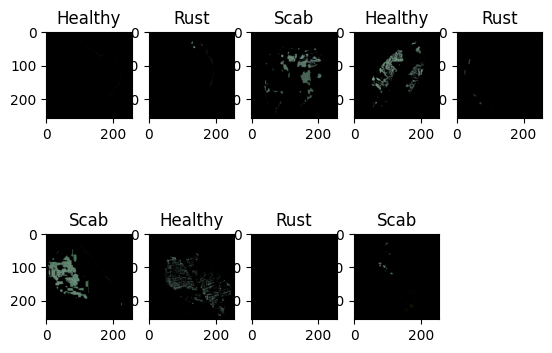

In [62]:
disease_segmented_scab1= segment_disease_scab(green_segmented1)
ddisease_segmented_scab2= segment_disease_scab(green_segmented2)
disease_segmented_scab3= segment_disease_scab(green_segmented3)
disease_segmented_scab4= segment_disease_scab(green_segmented4)
disease_segmented_scab5= segment_disease_scab(green_segmented5)
disease_segmented_scab6= segment_disease_scab(green_segmented6)
disease_segmented_scab7= segment_disease_scab(green_segmented7)
disease_segmented_scab8= segment_disease_scab(green_segmented8)
disease_segmented_scab9= segment_disease_scab(green_segmented9)

plt.subplot(251)
plt.imshow(cv2.cvtColor(disease_segmented_scab1, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(252)
plt.imshow(cv2.cvtColor(ddisease_segmented_scab2, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(253)
plt.imshow(cv2.cvtColor(disease_segmented_scab3, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(254)
plt.imshow(cv2.cvtColor(disease_segmented_scab4, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(255)
plt.imshow(cv2.cvtColor(disease_segmented_scab5, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(256)
plt.imshow(cv2.cvtColor(disease_segmented_scab6, cv2.COLOR_BGR2RGB))
plt.title('Scab')
plt.subplot(257)
plt.imshow(cv2.cvtColor(disease_segmented_scab7, cv2.COLOR_BGR2RGB))
plt.title('Healthy')
plt.subplot(258)
plt.imshow(cv2.cvtColor(disease_segmented_scab8, cv2.COLOR_BGR2RGB))
plt.title('Rust')
plt.subplot(259)
plt.imshow(cv2.cvtColor(disease_segmented_scab9, cv2.COLOR_BGR2RGB))
plt.title('Scab')

Resaltar partes oscuras con filtro pasa bajo

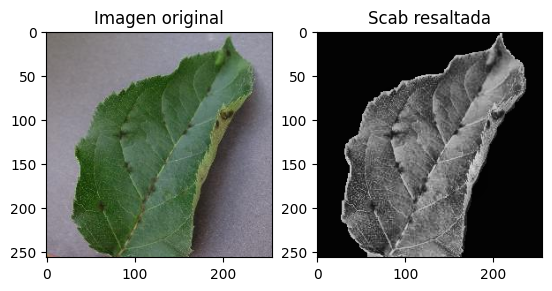

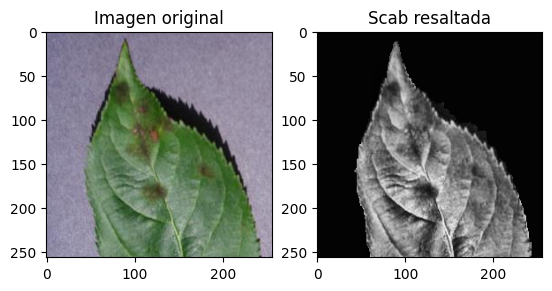

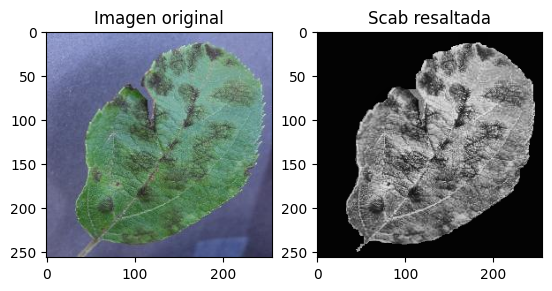

In [69]:

def resaltar_partes_oscuras(image):
    # Convierte la imagen a escala de grises
    gray_image = cv2.cvtColor(preprocess_image(image), cv2.COLOR_BGR2GRAY) ##Preprocess_image es la imagen de la hoja verde

    # Aplica la ecualización de histograma adaptativo a la imagen en escala de grises
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(gray_image)

    # Fusiona la imagen en escala de grises ecualizada con la imagen original en color
    enhanced_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

    return enhanced_image

org_images = []
for i in range (581,584,1):
    org_images.append (cv2.imread(PATH + str(i) + ".jpg", cv2.IMREAD_COLOR)) 
    dark_parts= resaltar_partes_oscuras(org_images[-1])
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(dark_parts, cv2.COLOR_BGR2RGB))
    plt.title('Scab resaltada')
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(org_images[-1], cv2.COLOR_BGR2RGB))
    plt.title('Imagen original')
    plt.show()

In [70]:
def aplicar_umbralizacion_otsu(image):
    # Convierte la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplica la umbralización automática con el método de Otsu
    _, threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return threshold_image

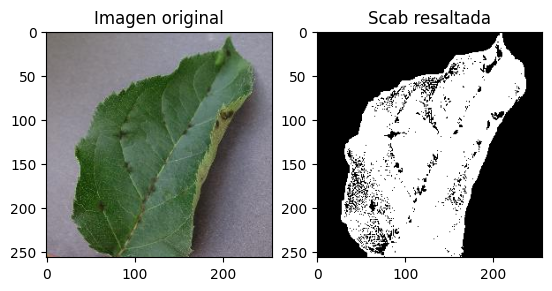

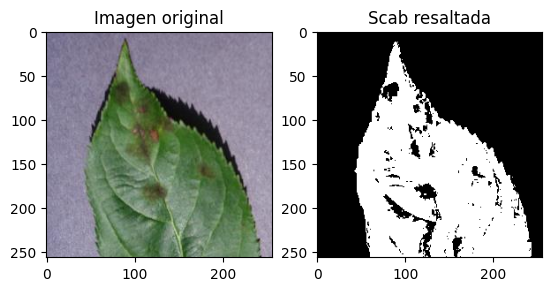

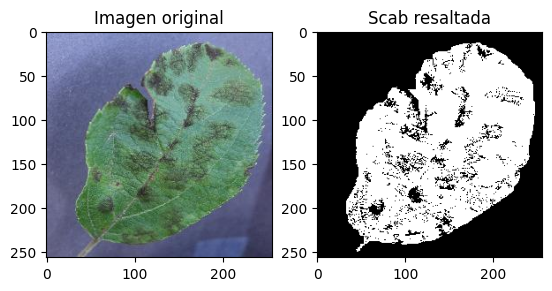

In [73]:

for i in range (581,584,1):
    org_images.append (cv2.imread(PATH + str(i) + ".jpg", cv2.IMREAD_COLOR)) 
    dark_parts= resaltar_partes_oscuras(org_images[-1])
    threshold_image= aplicar_umbralizacion_otsu(dark_parts)
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(threshold_image, cv2.COLOR_BGR2RGB))
    plt.title('Scab resaltada')
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(org_images[-1], cv2.COLOR_BGR2RGB))
    plt.title('Imagen original')
    plt.show()